# Gabriel Figueirêdo Gomes - Validação de Modelos de Clusterização

## Infraestrutura

### Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

* Você está rodando em Python 3.9+
* Você está usando um ambiente virtual: Virtualenv ou Anaconda
* Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico
* Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.
* Tire um printscreen do ambiente que será usado rodando em sua máquina.
* Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

In [1]:
!python -V

Python 3.9.5


### Printscreen do ambiente rodando na  máquina.

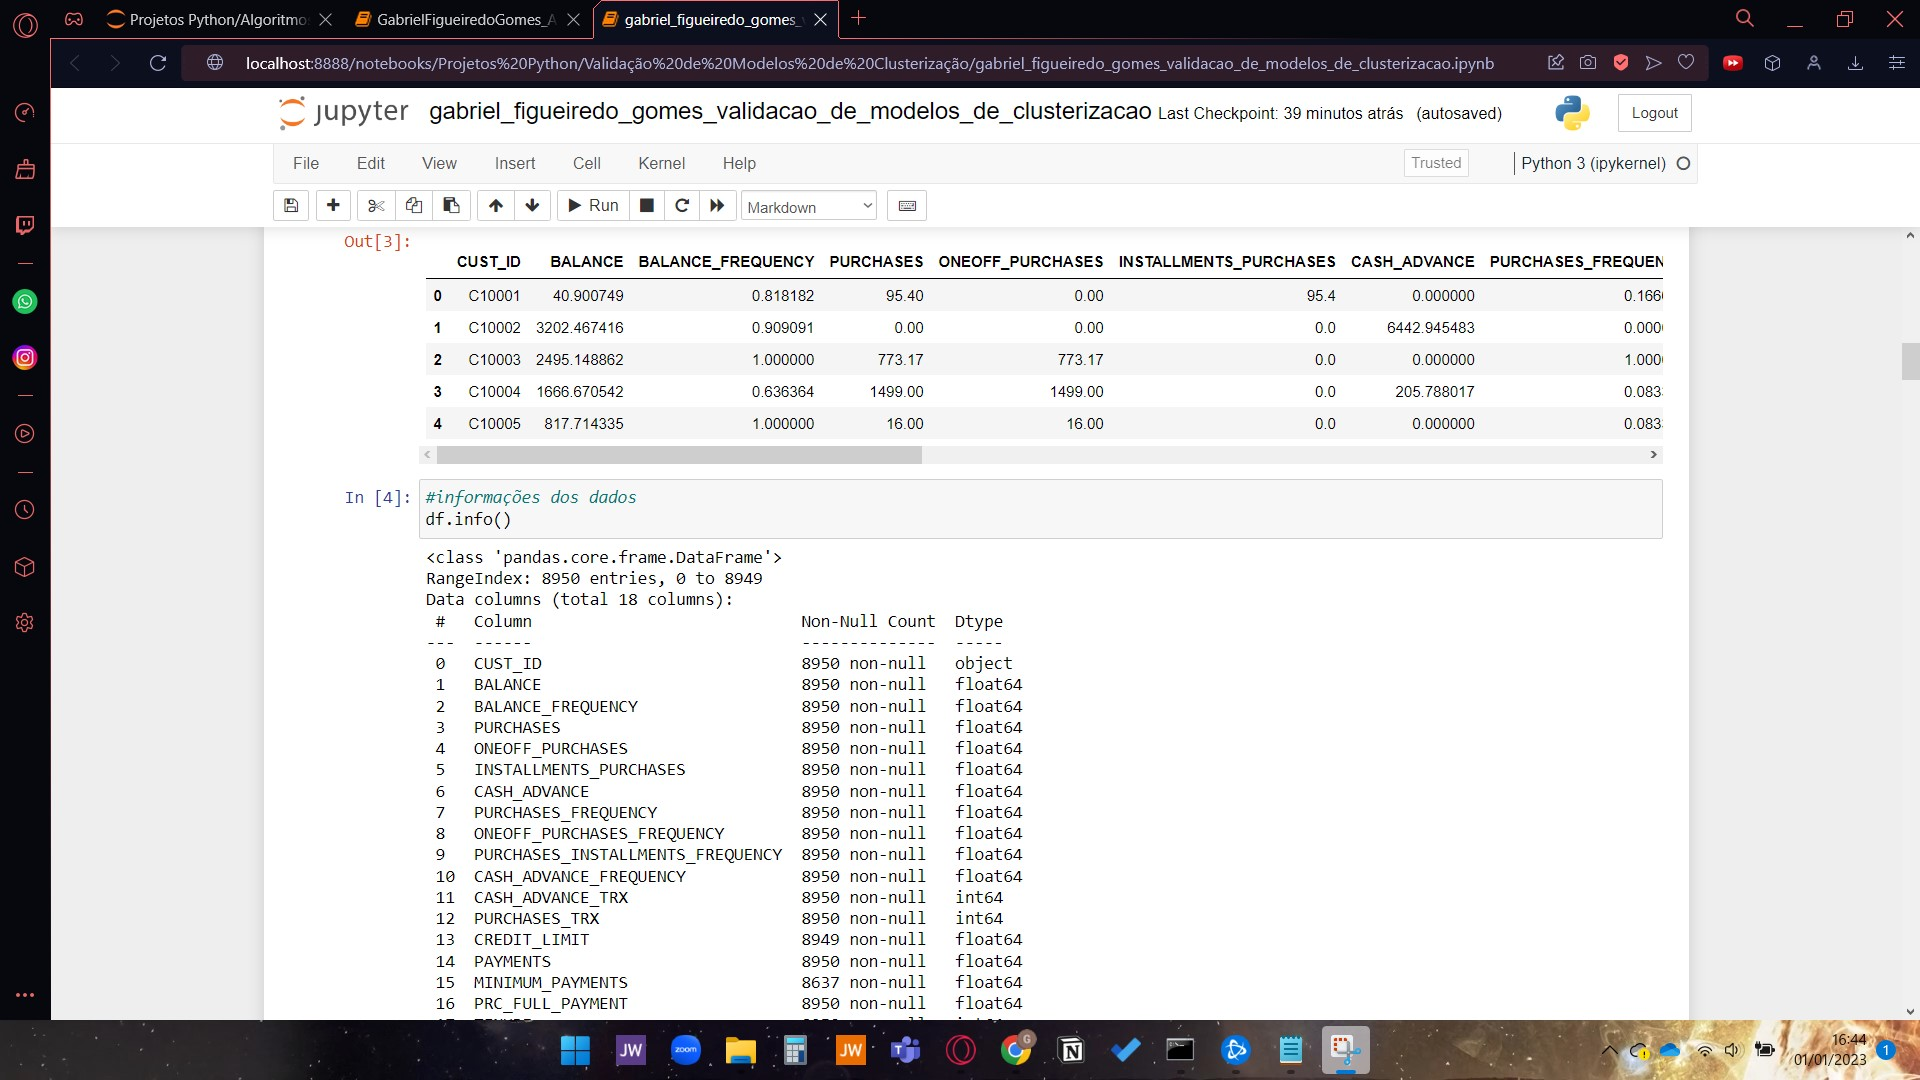

## Escolha de base de dados

### Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

* Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.
* Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.
* Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
* Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

#### 1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

A base da dados escolhida foi a do kaggle sobre cartão de crédito:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download

## Sobre o conjunto de dados
Este caso requer o desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing. O
conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 titulares de cartão de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis ​​comportamentais.

A seguir está o dicionário de dados para o conjunto de dados do cartão de crédito: -

| COLUNA | DESCRIÇÃO |
| ------ | --------- |
|CUST ID | Identificação do titular do Cartão de Crédito (Categórico) |
|SALDO | Saldo que resta na conta para fazer compras
|BALANCEFREQUENCY | Com que frequência o Saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência) |
|COMPRAS | Quantidade de compras feitas na conta |
|ONEOFF PURCHASES | Valor máximo da compra feita de uma só vez |
|INSTALLMENTSPURCHASES | Valor da compra feita em parcelas |
|CASH ADVANCE | Dinheiro adiantado dado pelo usuário |
|PURCHASESFREQUENCY | Com que frequência as Compras estão sendo feitas, pontue entre 0 e 1 (1 = comprado com frequência, 0 = não comprado com frequência) |
|ONEOFFPURCHASESFREQUENCY | Com que frequência as Compras são feitas de uma só vez (1 = compradas com frequência, 0 = compradas com pouca frequência) |
|PURCHASESINSTALLMENTSFREQUENCY | Com que frequência as compras parceladas estão sendo feitas (1 = feito com frequência, 0 = não feito com frequência) |
|CASHADVANCEFREQUENCY | Com que frequência o dinheiro adiantado está sendo pago |
|CASHADVANCETRX | Número de transações feitas com "Cash in Advanced" |
|PURCHASES TRX | Número de transações de compra made |
|CREDITLIMIT | Limite do Cartão de Crédito para |
|PAGAMENTOS do usuário | Valor do pagamento feito pelo usuário |
|MINIMUM_PAYMENTS | Valor mínimo dos pagamentos feitos pelo usuário |
|PRCFULLPAYMENT | Porcentagem do pagamento total pago pelo usuário |
|TENURE | Posse do serviço de cartão de crédito para o usuário |

#### 2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

Visto que trabalho no setor bancário, acredito que esse estudo de caso irá agregar valor a minha rotina diaria.

#### 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
#### 4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Escalar dados
from sklearn.preprocessing import StandardScaler

# Clusterização K-means
from sklearn.cluster import KMeans

# Clusterização DBSCAN
from sklearn.cluster import DBSCAN

# Determinar o parâmetro ideal para DBSCAN
from sklearn.neighbors import NearestNeighbors

# Gráfico Elbow, para ajudar a definir número de cluster
from yellowbrick.cluster import KElbowVisualizer

# Indice de Silhouette
from yellowbrick.cluster import SilhouetteVisualizer

# PCA
from sklearn.decomposition import PCA

import numpy as np

#metodos de validação de cluster
from sklearn import metrics

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
#informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Removendo coluna do ID (variavel object) e removendo a coluna 'TENURE'
# Acredito que a coluna TENURE não vai acrescentar em nada na nossa clusterização, por se tratar de um coluna que corresponder
# a tempo em que o usúario possi o cartão de crédito, por isso também vamos excluir.
df = df.drop(['CUST_ID', 'TENURE'], axis=1)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [6]:
#verificando dados faltantes
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [7]:
#Verificando tamanho da base de dados
df.shape

(8950, 16)

In [8]:
# Como nossa base de dados é grande o sufiente acredito 
# que não haverá prejuizo ao modelo por remover todos o dados nulos ou faltantes

df = df.dropna()
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [9]:
df.shape

(8636, 16)

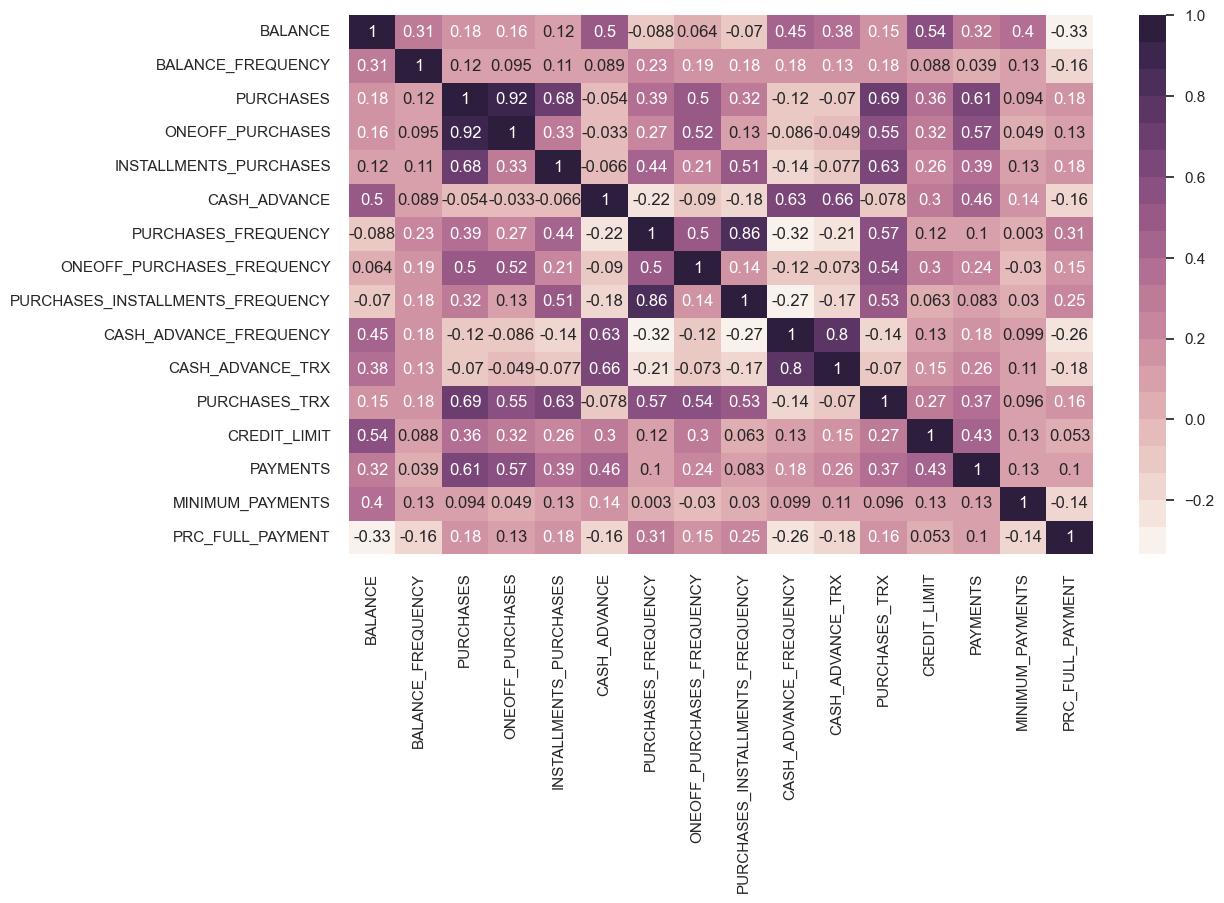

In [10]:
# Configuranção do tamanho da figura
sns.set(rc= {'figure.figsize':(15,8)})

# Definindo a cor
cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15)

#correlação entre os dados
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True), cmap =cmap, annot=True);

Podemos observar e validar algumas observações aqui:

* Compras, compras pontuais e compras de investimento são altamente correlacionadas. Ou seja, a maioria das compras são compras únicas
* As pessoas não fazem pagamentos completos quando o saldo é alto
* A frequência de compra e a frequência de adiantamento de dinheiro são inversamente correlacionadas. Ou seja, como a frequência de compra é alta, o número de vezes que se paga à vista é menor e vice-versa

Obeservamos também uma alta correlação entre PURCHASES - ONEOFF_PURCHASES, PURCHASES_INSTALLMENTS_FREQUENCY-PURCHASES_FREQUENCY


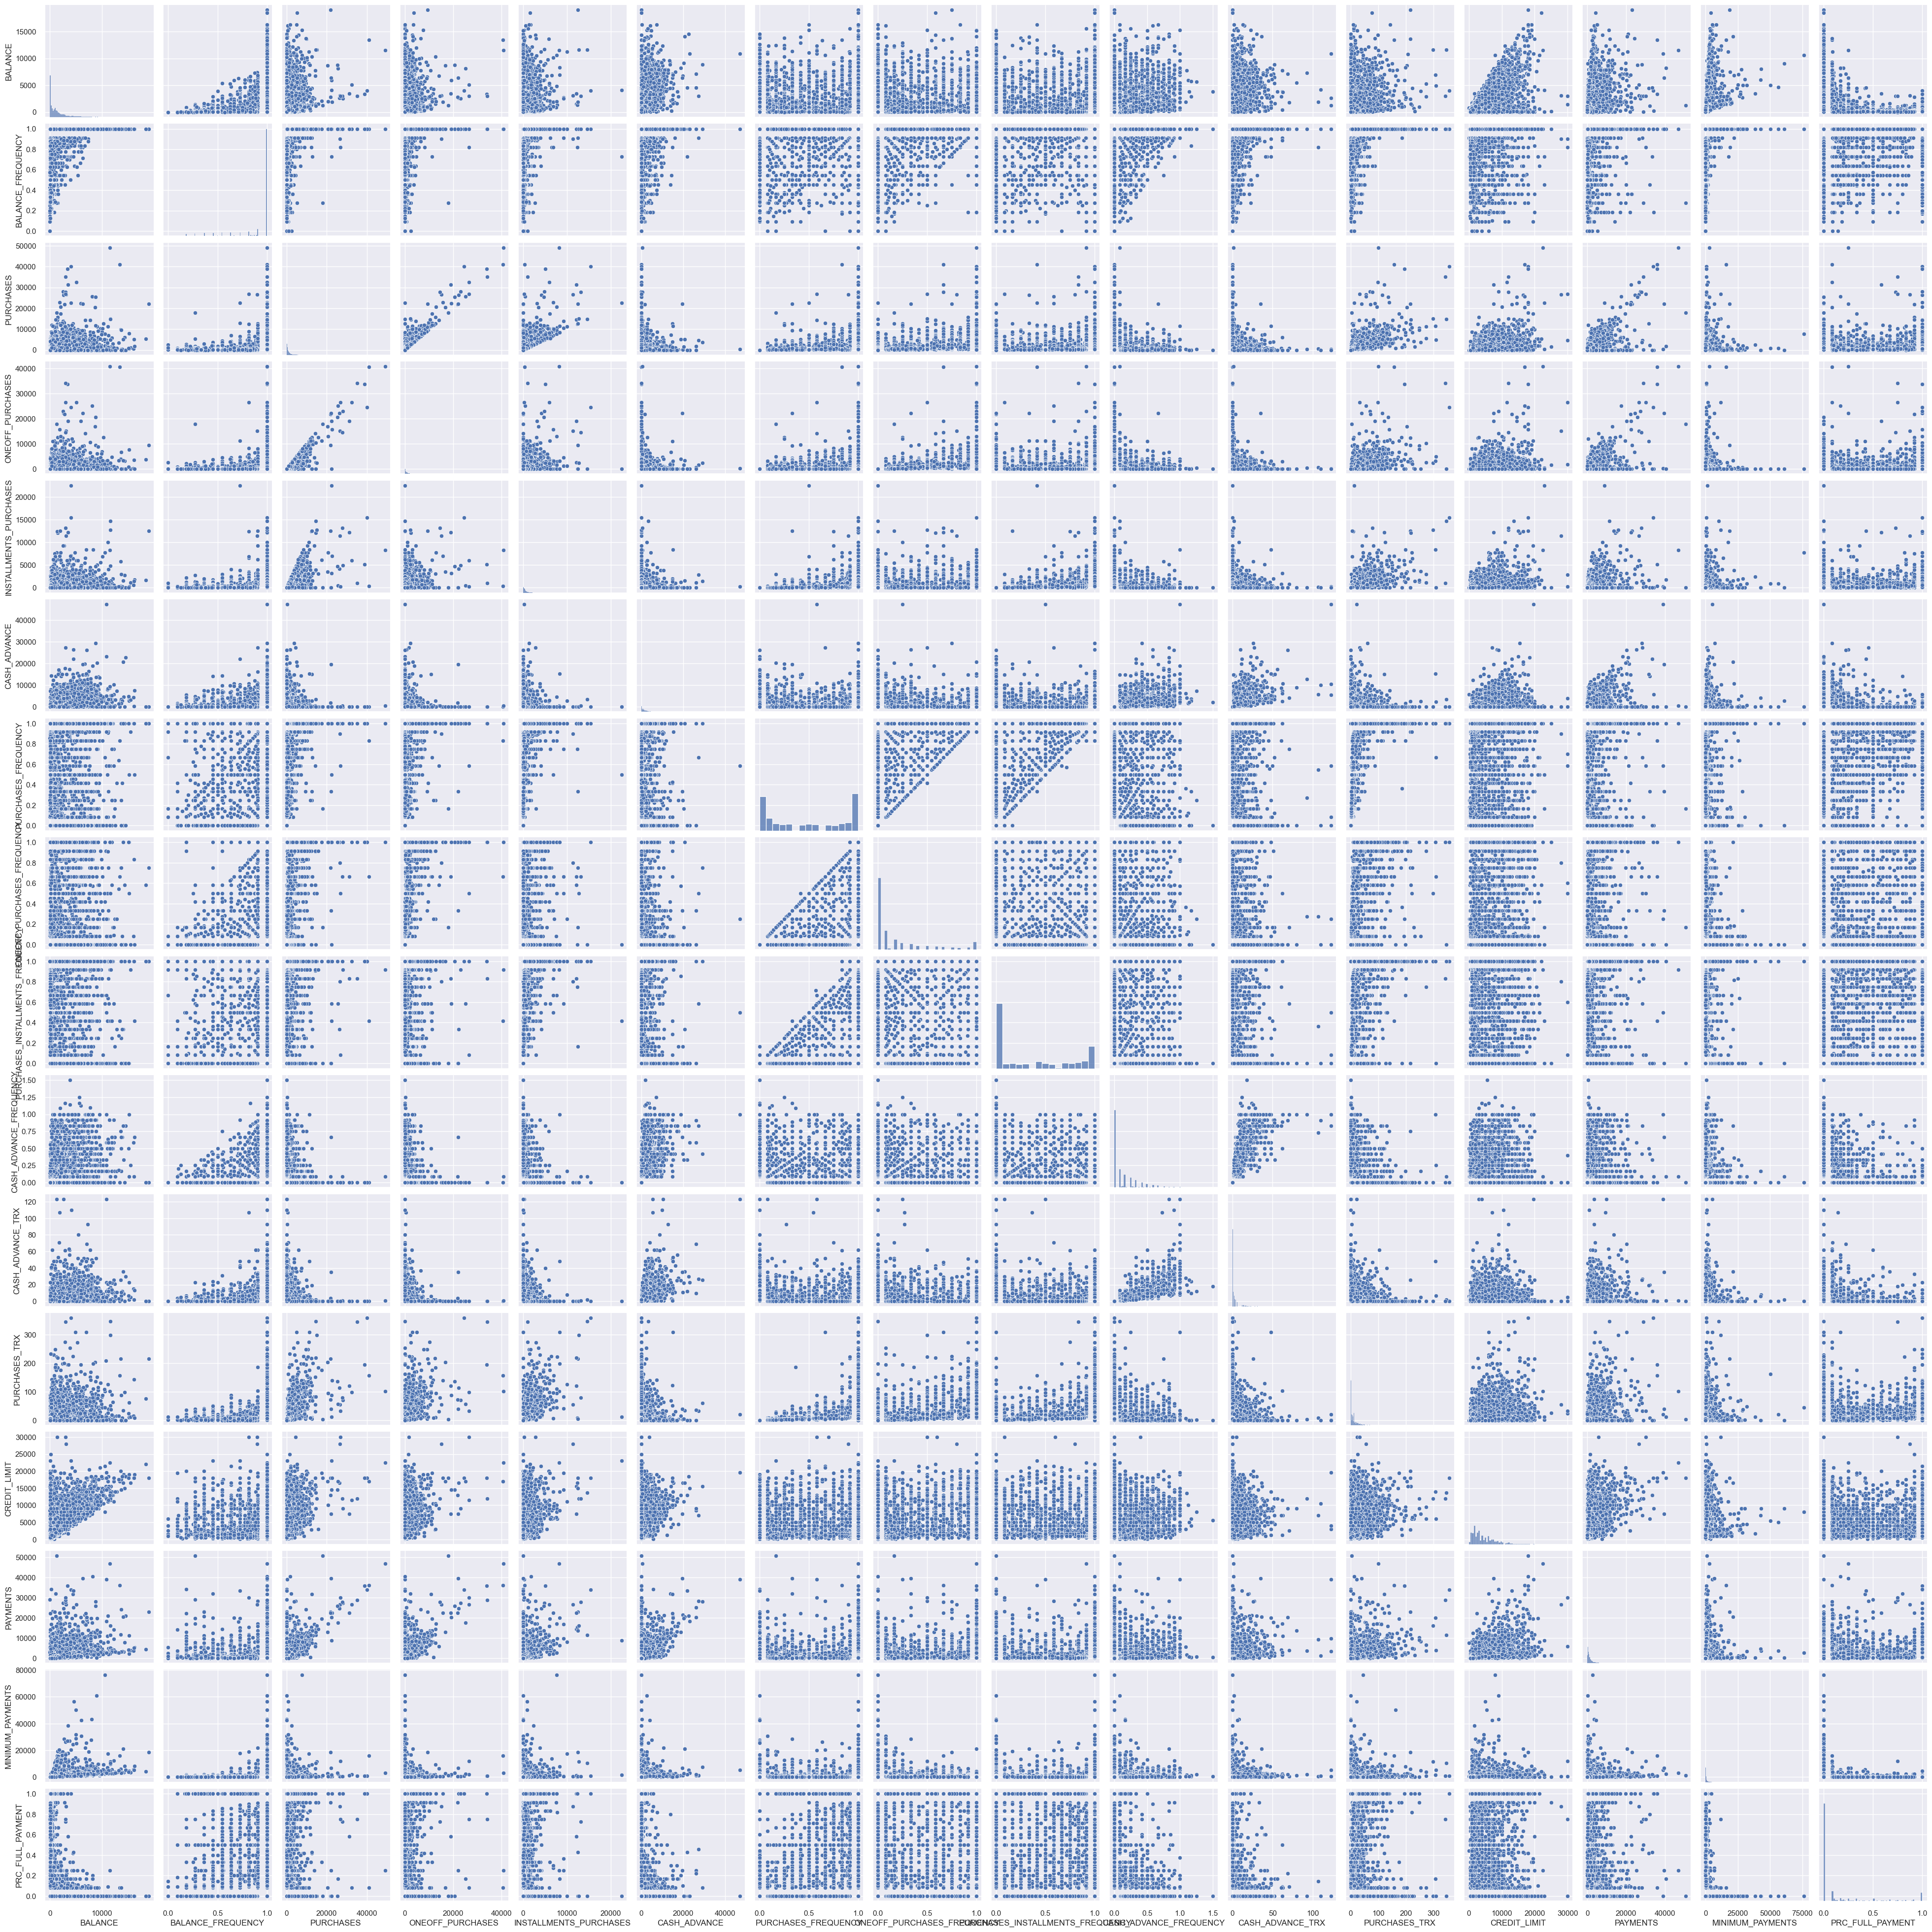

In [11]:
#pairplot de todos dados para termos uma visão geral.

sns.pairplot(df)
plt.show();

In [12]:
# normalizando dados na mesma escala

scaler = StandardScaler()
X_scaler = scaler.fit_transform(df)
X_scaler

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.54394191,
        -0.30550763, -0.53772694],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.79685226,
         0.08768873,  0.21238001],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.39950328,
        -0.09990611, -0.53772694],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.5853667 ,
        -0.32957217,  0.30614422],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.59523762,
        -0.34081076,  0.30614422],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.59158925,
        -0.32709767, -0.53772694]])

Redução de Dimensões usando PCA
K-means, DBSCAN e agrupamento aglomerativo, todos usam a distância euclidiana, que começa a perder seu significado quando o número de dimensões começa a aumentar. então, antes de usar esses métodos, temos que reduzir o número de dimensões. Vou usar o PCA, que é de longe o algoritmo de redução de dimensionalidade mais popular.


aqui defino o parâmetro n_components igual a 0,9, o que significa que o PCA produzirá automaticamente PCs suficientes que preservarão 90% da variância no conjunto de dados.

In [13]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(X_scaler)
pca_data = pca.transform(X_scaler)
X = pca_data

# Clusterização

### 1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:
       1. K-Médias
       2. DBScan

#### Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.

> # K-means

In [14]:
# Definindo um número ótimo de cluster com índice de silhueta

silhouette_avgs = []
min_k = 2
 
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

# O k ideal é aquele com a maior silhueta média
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Melhor número de K", Optimal_K)

Silhouette Coefficients for k = 2 is 0.24053660271965113
Silhouette Coefficients for k = 3 is 0.27752199314204323
Silhouette Coefficients for k = 4 is 0.23830194750302078
Silhouette Coefficients for k = 5 is 0.23317662874803405
Silhouette Coefficients for k = 6 is 0.25356349002925327
Silhouette Coefficients for k = 7 is 0.2599474622656431
Silhouette Coefficients for k = 8 is 0.26468852329559106
Silhouette Coefficients for k = 9 is 0.24999851814185292
Melhor número de K 3


* De acordo com indice de silhueta o número ideal de cluster é 3.
Ou seja, vamos ter 3 grupos de clientes diferentes que usam cartão de crédito.

In [15]:
# Treinando modelo com k-means

kmeans_clusters = KMeans(n_clusters=3, random_state=42, max_iter=300, n_init=10)
kmeans_clusters.fit(X)
y_kmeans = kmeans_clusters.predict(X)

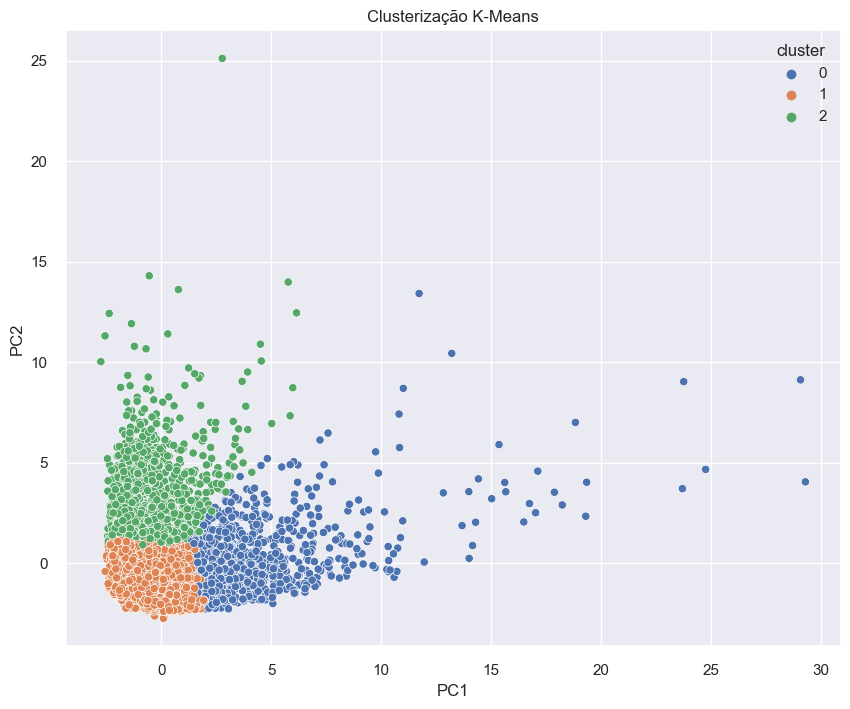

In [16]:
#plot visual da nossa clusterização.

sns.set_style("darkgrid")

def plot_cluster_points(df, labels, ax=None):
    pca = PCA(2) 
    pca_data_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2']) 
    pca_data_plot['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data_plot, ax=ax)

plt.subplots(figsize=(10, 8))
plot_cluster_points(X, kmeans_clusters.labels_)
plt.title('Clusterização K-Means');

## Avaliando o modelo - K-Means

* O coeficiente de silhueta é um valor entre -1 e 1. Quanto maior a pontuação, melhor. 1 indica clusters compactos e 0 significa clusters sobrepostos.

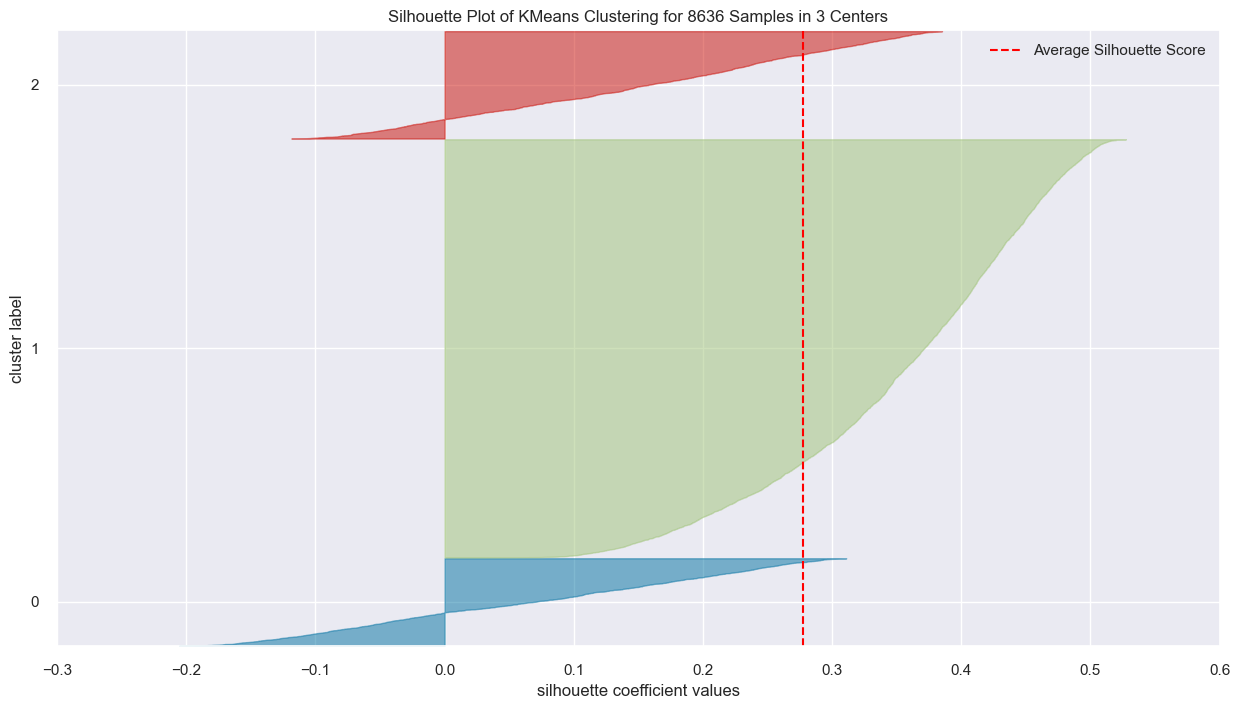

In [17]:
visualizer = SilhouetteVisualizer(kmeans_clusters, colors='yellowbrick')

visualizer.fit(pca_data)  
visualizer.show(); 

Aqui, a linha vermelha pontilhada vertical neste gráfico é a pontuação média. Parece que nosso método de clusterização é bom, pois cada cluster fica acima da média e as pontuações do cluster parecem decentes.

In [18]:
labels = kmeans_clusters.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.27752199314204323

> # DBScan

##### Calculando os parâmetros  para clustering DBSCAN
DBSCAN requer dois parâmentros para realizar o clustering o 'eps' e o 'min_samples'. O min_samples é fácil de configurar, deve 4 para conjuntos de dados bidimensionais. Para conjuntos de dados multidimensionais, min_samples deve ser 2 * n° de dimenções. Por exemplo, se seu conjunto de dados tiver 6 recursos, defina min_samples = 12.

Outra questão é qual valor ideal deve ser usado para o 'eps. O 'eps' um pouco mais difícil de definir e depende da função de distância. O 'eps ser o menor possível.

Para determinar o parâmetro ideal de 'eps', vamos calcular as distâncias do vizinho mais próximo (kNN) (distância média de cada ponto de dados para seus vizinhos mais próximos) de um conjunto de dados de entrada usando o método do vizinho mais próximo (aprendizado de vizinhos mais próximos não supervisionado). Para encontrar o k vizinho mais próximo, usaremos a função sklearn.neighbors.NearestNeighbors.

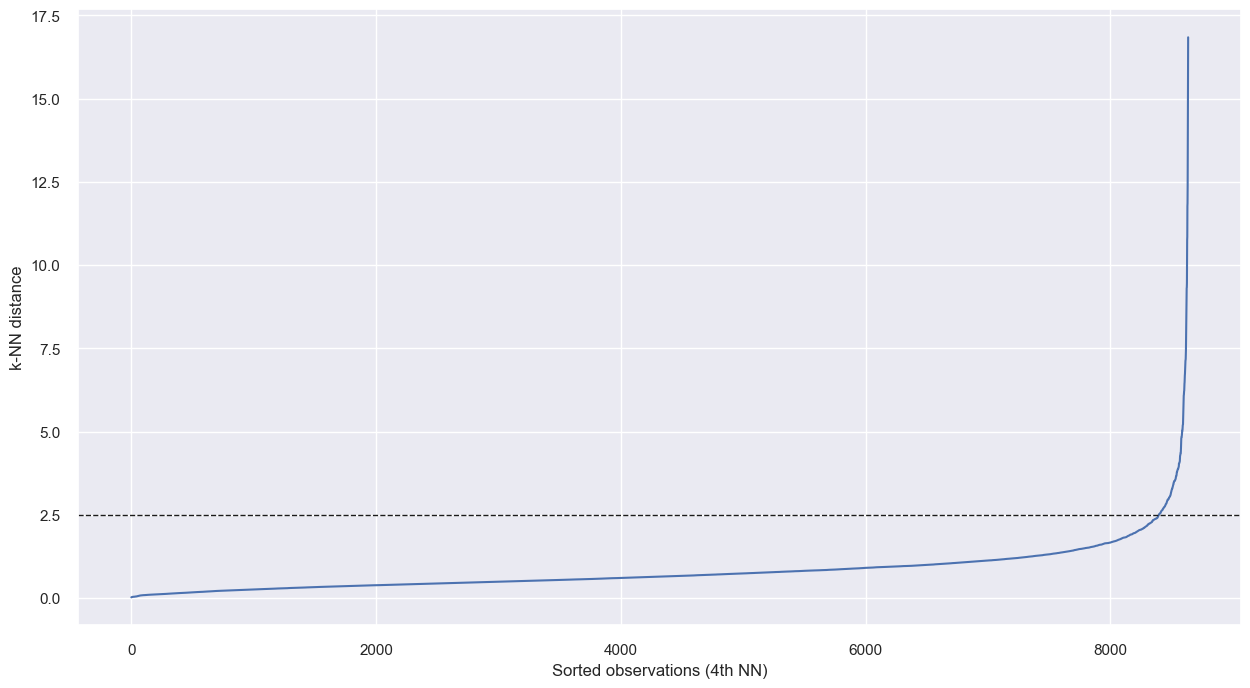

In [19]:
nbrs = NearestNeighbors(n_neighbors=38).fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [20]:
dbscan_clusters = DBSCAN(eps=2.5, min_samples=37).fit(X)
# get cluster labels
y_dbscan = dbscan_clusters.labels_

In [21]:
set(dbscan_clusters.labels_)

{-1, 0}

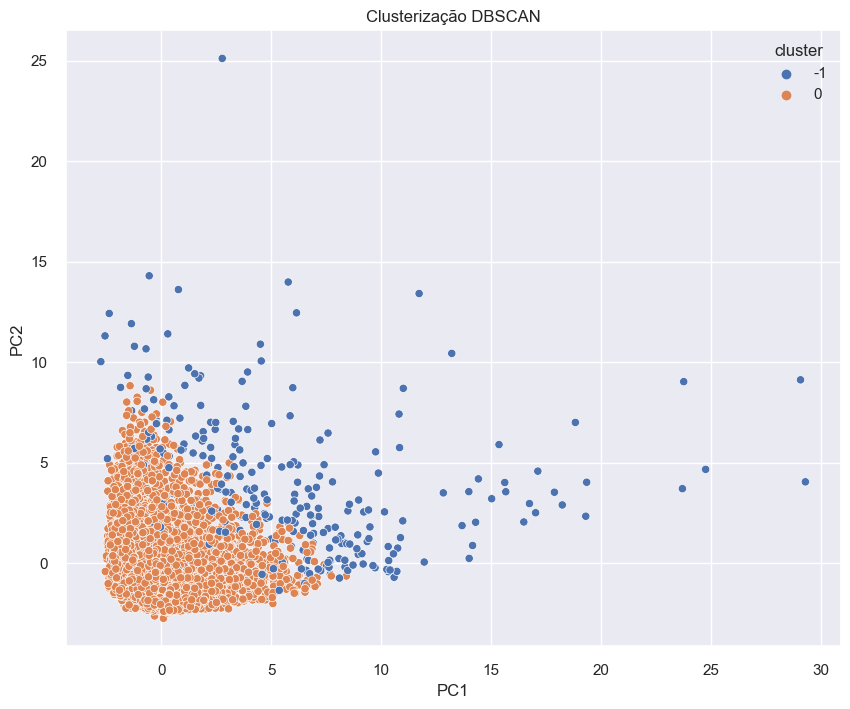

In [22]:
# plot agrupamento DBscan

def plot_cluster_points_dbscan(df, labels, ax=None):
    pca = PCA(2) 
    pca_data_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2']) 
    pca_data_plot['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data_plot, ax=ax)

plt.subplots(figsize=(10, 8))
plot_cluster_points_dbscan(X, dbscan_clusters.labels_)
plt.title('Clusterização DBSCAN');

## Avaliando o modelo - DBScan

* O coeficiente de silhueta é um valor entre -1 e 1. Quanto maior a pontuação, melhor. 1 indica clusters compactos e 0 significa clusters sobrepostos.

In [23]:
silhoutte_dbscan = metrics.silhouette_score(X, y_dbscan, metric='euclidean')
silhoutte_dbscan

0.6029949098272571

### 2.  Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

Os Clusters formados usando K-Means são mais ou menos esféricos ou convexos e tem aproximadamente o mesmo tamanho. O clustering K-means é mais eficiente visto que o conjunto de dado escolhido é grande e compacto. K-means não funciona bem com outliers e conjuntos de dados ruidosos, mas usando o indice de silhueta para escolher a quantidade de cluster de 3, aparentimento o algoritimos se comportou bem. Caso realizamos um tratamento dos dados removendo alguns outliers o resulto seria ainda melhor. 



Usando DBSCAN clusters de formato arbitrário podem ser formados. Considerando que, no caso de DBSCAN, não há necessidade de especificar o número de clusters manualmente. Embora tenhamos feitos varios teste, com parametros de 'eps' e  'min_samples' o cojunto de dados não se comportou bem com DBScan, acredito que devido o conjunto de dados ser muito compacto. Isso por que o algoritimo não trabalha com a média mais com K vizinhos e visto que todos os pontos são bem próximos um do outro todos são vizinhos, embora a gente diminua a quantidade de vizinhos ou o raio de distancia entre eles para conseguir fazer um agrupamento, o algoritimo acaba gerando um número alto de cluster e com poucos pontos nos grupos formados, não fazendo sentido.

### 3. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

#### 1. Medida de Validação - Davies-Bouldin Index

* O índice de Davies-Bouldin é calculado como a similaridade média de cada cluster com um cluster mais semelhante a ele.

* Ele serve para checarmos se os clusters estão bem separados e bem compactos. Quanto mais próximo de 0, melhor serão os clusters.

* A pontuação mínima é zero, com valores menores indicando melhor agrupamento.

In [24]:
# davies bouldin no k-menas
db_index_kmeans = metrics.davies_bouldin_score(X, y_kmeans)
db_index_kmeans

1.4163249194780112

In [25]:
# davies bouldin no DBScan
db_index_dbscan = metrics.davies_bouldin_score(X, y_dbscan)
db_index_dbscan

1.6357075918356343

In [26]:
# definindo número de k-means com Davies-Bouldin Index

results_davies_boldin = {}
davies_bouldin = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    db_index = metrics.davies_bouldin_score(X, labels)
    results_davies_boldin.update({i: db_index})
    davies_bouldin.append(db_index)

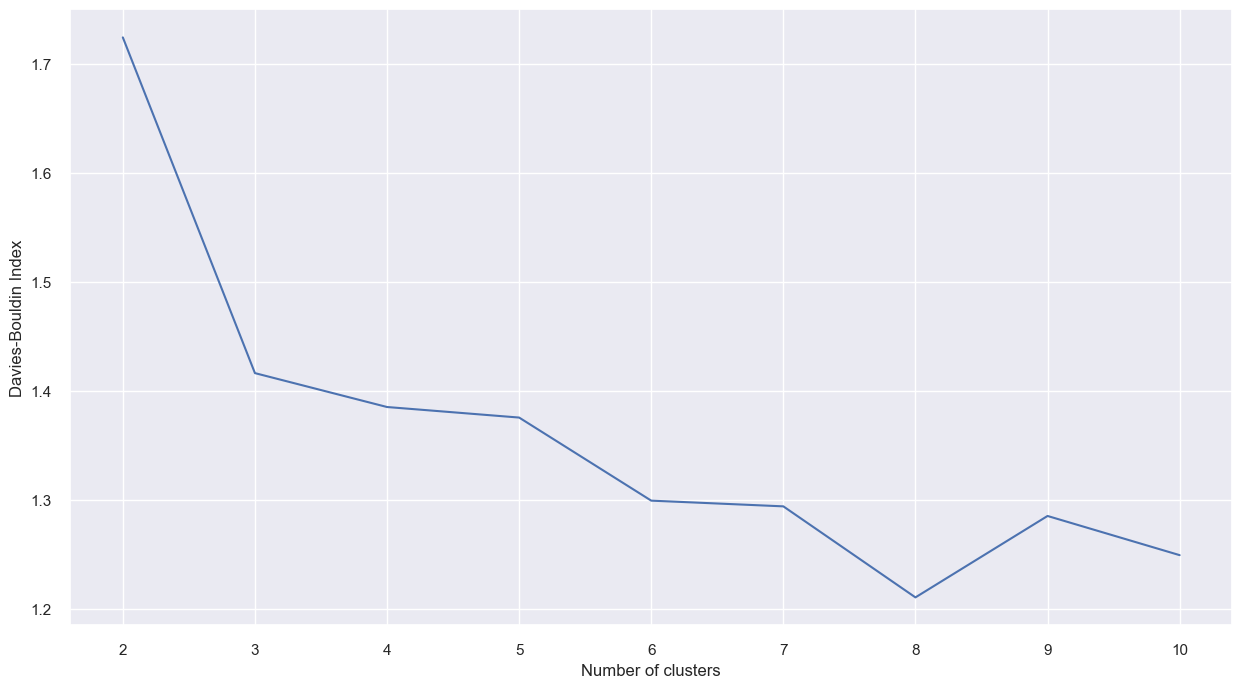

In [27]:
# plot número de K usando Davies-Bouldin Index

plt.plot(list(results_davies_boldin.keys()), list(results_davies_boldin.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin Index")
plt.show()

In [28]:
results_davies_boldin

{2: 1.7242673977691898,
 3: 1.4163249194780112,
 4: 1.3852281770602521,
 5: 1.3755538876697806,
 6: 1.299343340968865,
 7: 1.2941042197034693,
 8: 1.2106065683301628,
 9: 1.285291640981673,
 10: 1.2493519936972928}

In [29]:
# O k ideal é aquele com a menor valor de Davies-Bouldin

Optimal_K = davies_bouldin.index(min(davies_bouldin)) + 2
print(f"Melhor número de K é {Optimal_K}: {results_davies_boldin[Optimal_K]}")

Melhor número de K é 8: 1.2106065683301628


Embora neste exemplo as medidas estejam muito próximas umas das outras, ainda podemos observar que a escolha de 8 clusters minimiza a medida de similaridade. Que seria uma diferença grande em relação a número de clusters escolhido usando Silhouette Coefficient.

#### 3. Medida de Validação - Calinski-Harabasz

Um Calinski-Harabasz alto significa melhor agrupamento, pois as observações em cada agrupamento estão mais próximas (mais densas), enquanto os próprios agrupamentos estão mais distantes uns dos outros (bem separados).

In [30]:
ch_index_kmeans = metrics.calinski_harabasz_score(X, y_kmeans)
ch_index_kmeans

1893.0909972713964

In [31]:
ch_index_dbscan = metrics.calinski_harabasz_score(X, y_dbscan)
ch_index_dbscan

1093.5772128104904

In [32]:
# Vamos calcular o índice Calinski Harabasz para um intervalo de números de clusters e, 
# em seguida, encontrar os valores mais altos:

results_calinski_harabasz = {}
calinski_harabasz = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    ch_index = metrics.calinski_harabasz_score(X, labels)
    results_calinski_harabasz.update({i: ch_index})
    calinski_harabasz.append(ch_index)

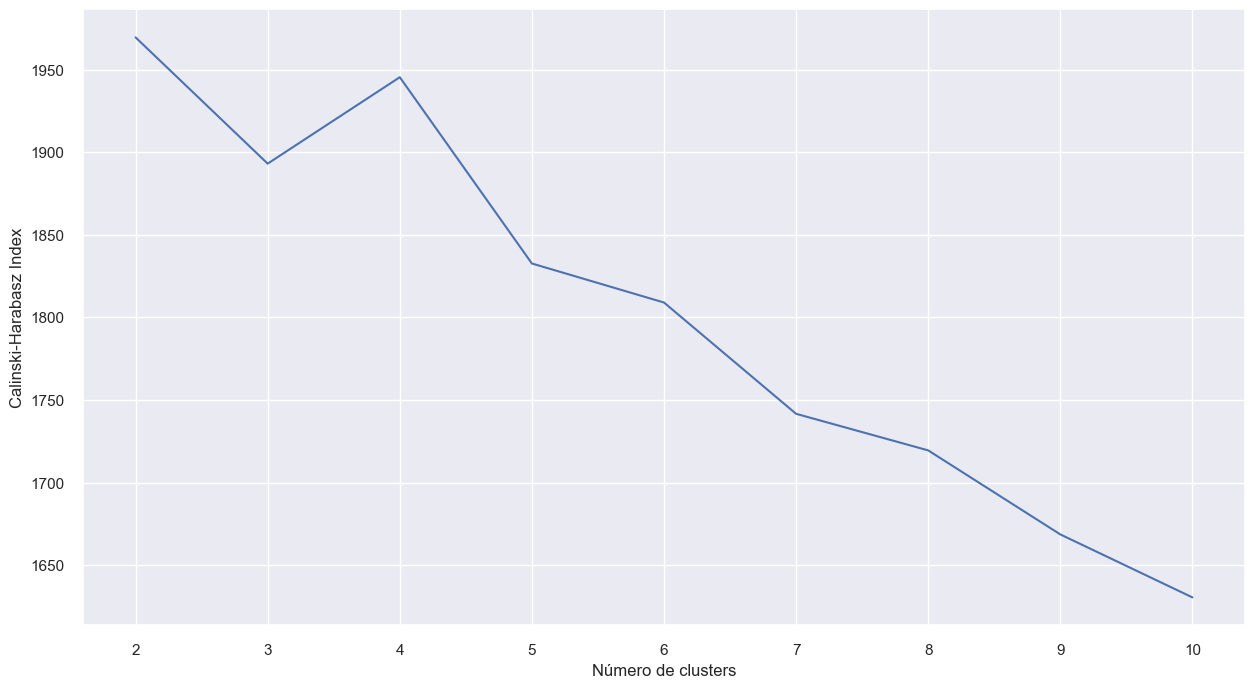

In [33]:
# plot número de K usando Calinski-Harabasz Index

plt.plot(list(results_calinski_harabasz.keys()), list(results_calinski_harabasz.values()))
plt.xlabel("Número de clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [34]:
results_calinski_harabasz

{2: 1969.5327918062633,
 3: 1893.0909972713964,
 4: 1945.4136035416434,
 5: 1832.6244791776369,
 6: 1808.9921371749847,
 7: 1741.6125373240322,
 8: 1719.4635646680217,
 9: 1668.59121756846,
 10: 1630.4542886803376}

In [35]:
# O k ideal é aquele com a maior valor de Calinski-Harabasz Index

Optimal_K = calinski_harabasz.index(max(calinski_harabasz)) + 2
print(f"Melhor número de K {Optimal_K}: {results_calinski_harabasz[Optimal_K]}")

Melhor número de K 2: 1969.5327918062633


Encontramos um resultado interessante de que 2 clusters e 4 clusters fornecem um valor de índice Calinski-Harabasz mais alto do que 3 clusters mesmo que o Silhouette Coefficient indique que seja melhor com 3.

#### 3. Medida de Validação - Silhouette Coefficient

In [36]:
silhoutte_kmeans = metrics.silhouette_score(X, y_kmeans, metric='euclidean')
silhoutte_kmeans

0.27752199314204323

In [37]:
silhoutte_dbscan = metrics.silhouette_score(X, y_dbscan, metric='euclidean')
silhoutte_dbscan

0.6029949098272571

In [38]:
# criando dataFrame para vacilita vizualização das metricas. 

metricas = {'K-Means': {'Silhouette': silhoutte_kmeans,
                       'Davies_Bouldin': db_index_kmeans,
                       'Calinski_Harabasz': ch_index_kmeans},
           'DBscan': {'Silhouette': silhoutte_dbscan,
                       'Davies_Bouldin': db_index_dbscan,
                       'Calinski_Harabasz': ch_index_dbscan}
           }

tabela_validacao = pd.DataFrame(metricas)
tabela_validacao

K-Means       DBscan
Silhouette            0.277522     0.602995
Davies_Bouldin        1.416325     1.635708
Calinski_Harabasz  1893.090997  1093.577213

Ao usamos as metricas de validação de clusters, em todas as situações a o K-Means foi superior ao DBscan. Então vamos fazer um resumo levando em conta apenas o K-Means.

#### Em Resumo.

Temos três índices diferentes agora para avaliar nosso clusters, mas como podemos dizer se são bons valores? Qual é a base?

* Na métrica de Silhouette, sabemos que o valor tem um intervalo que vai de -1 até 1, portanto se o cluster obter um valor positivo isso é um bom sinal.

* No caso da métrica de Davies Bouldin, quanto mais próximo de 0 o valor, melhor. 

* No Calinski-Harabasz, é melhor que o valor seja o mais alto possível.

É difícil fazer qualquer avaliação se considerarmos apenas o valor que os algoritimos trazem. Embora já tenhamos feito a comparação a cima do Davies Bouldin e Calinski Harabasz com a Silhouette vamos fazer um breve resumo das diferença entre eles. 

Davies-Bouldin quanto maior for o índice de Davies-Bouldin (menor a similaridade média), melhor os clusters são separados e melhor é o resultado do agrupamento realizado por isso que ao rodar o algoritimo foi identificado que melhor número de K é 8, mas vimos que os valores são bem proximos então é bom avaliar mesmo se esse número de K seria o melhor no nosso caso.

Ja o índice Calinski-Harabasz, leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também. A principal diferença dele em relação às outras medidas é o cálculo da variância. Por isso que o valores melhores de K foi 2 e 4, os valores entre eles são bem próximo. 

### 4. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

A silhueta não é indicado para nós ajudar escolher o números de clusters para algoritmo de DBBScan em nossa base de dados. 
1. Primeiros para realizar o algoritimos DBSCan não é necessarios escolher o número de cluster. 
2. Conforme explicado na questão nossa base de dados não se conportou bem com DBScan visto que os dados estão muito próximos uns dos outros.

### Medidas de similaridade

#### 1.	Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários. 

•	Primeiro iremos localizar valores ausentes, discrepantes. Depois devemos fazer algumas inspeções de variáveis, podemos fazer isso com uso de histogramas, e descrições estáticas.

•	Em seguida vamos descobrir as relações entre as variáveis. A relação entre as variáveis precisa ser investigada. Isso inclui a direção e o tamanho aproximado de quaisquer correlações. Isso é importante para evitar vazamento de recursos e colinearidade.

Podemos usar o Dynamic Time Warping para nos ajudar nisso, visto que possuímos 10 series temporais e provavelmente as velocidades entre si são diferentes.

•	Também será necessário verificar a tendências e sazonalidade. Essas são umas das características mais importantes das séries temporais. Uma tendência é a presença de um aumento ou diminuição de longo prazo na sequência. A sazonalidade é uma variação que ocorre em intervalos regulares específicos de menos de um ano. A sazonalidade pode ocorrer em diferentes intervalos de tempo como diário, semanal, mensal ou anual.

•	Depois iremos para o pré-processamento dos dados. O pré-processamento é uma etapa crucial, no pré-processamento, queremos melhorar a qualidade dos dados para aplicar com sucesso um modelo de aprendizado de máquina.


•	Em seguida aplicaremos o algoritmo de cauterização. 


### 2.	Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

•	O algoritmo de agrupamento que podemos usar para esse caso, pode ser o K-Means, isso por que já sabemos o número de cluster que queremos. 


### 3.	Indique um caso de uso para essa solução projetada.

•	Um caso de uso para a solução pode ser agrupamento de mercado de ações.

### 4.	Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.


Em serie temporais também podemos usar outra medida para medir a similaridade que é a Correlação de Pearson.

Para utilizar tal estratégia precisamos realizar alguns passos:

* Para a correlação de Pearson, ambas as variáveis devem ser normalmente distribuídas. Isso às vezes é chamado de 'Curva Gaussiana'.

    Para verificar podemos plot alguns gráficos e verificar a distribuição dos dados. 
    

* Não deve haver outliers significativos .  O efeito dos outliers no coeficiente de correlação de Pearson pode trazer um resultado muito ruim. O coeficiente de correlação de Pearson, é muito sensível a outliers, que podem ter um efeito muito grande na linha de melhor ajuste e no coeficiente de correlação de Pearson. Por isso precisamos tratar os dados e remove os possíveis outliers.


* Cada variável deve ser contínua , ou seja, intervalo ou proporções, por exemplo, peso, tempo, altura, idade, etc. 


* As duas variáveis têm uma relação linear . Os gráficos de dispersão ajudarão você a saber se as variáveis têm uma relação linear. Se os pontos de dados tiverem uma linha reta (e não uma curva), os dados satisfarão a suposição de linearidade.


* As observações devem ser observações pareadas. Ou seja, para cada observação da variável independente, deve haver uma observação correspondente da variável dependente. Por exemplo, se você estiver calculando a correlação entre idade e peso. Se houver 12 observações de peso, você deverá ter 12 observações de idade. ou seja, sem espaços em branco.


* Resumindo para aplicar a correlação de Pearson precisamos tratar nossos dados conforme a necessidade, removendo dados faltantes, tratando ou removendo os outliers, verificar se a variáveis tem a mesma proporção, analisar a linearidade e verificar se as informações estão pareadas ou na mesma proporção em quantidade.

    Fazendo tal tratamento e os dados atendendo tais requisitos podemos aplicar a Correlação de Pearson para medir a similaridade entre serie temporais e conseguir tem um excelente resultado. 